In [3]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame, datetime
from datetime import datetime, timedelta, time
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew 
from scipy import stats

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt

### Load data

In [4]:
train=pd.read_csv('/Users/mirabooboo/Desktop/Kaggle/Kaggle_house_pricing/train.csv')
test=pd.read_csv('/Users/mirabooboo/Desktop/Kaggle/Kaggle_house_pricing/test.csv')

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [7]:
numerical = [i for i in train.columns if train.dtypes[i] != 'object']
categorical = [i for i in train.columns if train.dtypes[i] == 'object']
print("numerical: {}, categorical: {}" .format (len(numerical),len(categorical)))

numerical: 38, categorical: 43


In [8]:
num = [col for col in train.columns.values if train[col].dtype != 'object']
print (num)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [9]:
cat= [col for col in train.columns.values if train[col].dtype == 'object']
print (cat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


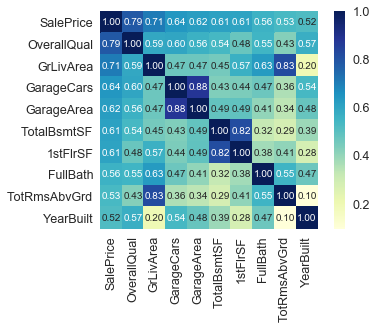

In [10]:
corrmat = train.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

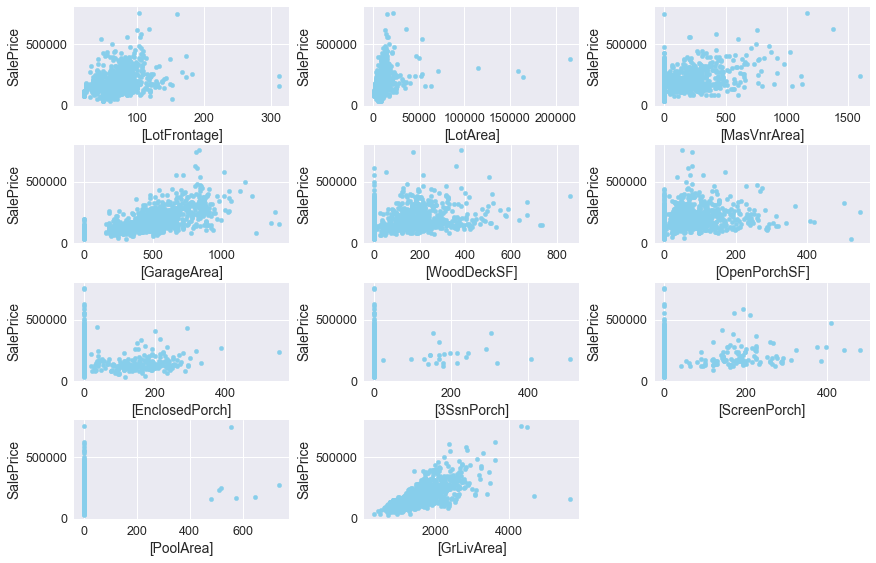

In [11]:
plt.figure(figsize=(13,11))
plt.subplots_adjust(top=0.92, bottom=0.1, left=0.10, right=0.95, hspace=0.4,wspace=0.35)
variable=['LotFrontage','LotArea','MasVnrArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','GrLivArea']
plot_number=1
for i in variable :
    ax=plt.subplot(5,3,plot_number)
    train.plot.scatter(x=[i],y='SalePrice',  color='skyblue', ylim=(0,800000),ax=ax)
    plot_number=plot_number +1 
plt.show()

In [12]:
train = train[train.GrLivArea <4000]
train= train[train.MasVnrArea<1500]
train=train[train.LotFrontage<300]

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1115.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,725.128680,57.253995,69.470143,9855.607233,6.100084,5.564340,1970.289319,1985.002523,99.582002,417.363331,43.409588,589.530698,1050.303616,1150.260723,341.873844,6.687973,1498.822540,0.407065,0.053827,1.560976,0.365854,2.862910,1.052145,6.521447,0.567704,1978.317489,1.758621,469.962153,89.188394,45.111859,22.960471,3.157275,15.013457,1.896552,25.747687,6.335576,2007.805719,179398.525652
std,421.610751,43.230835,21.964162,7729.956273,1.401385,1.098027,31.751196,21.215842,175.796631,432.653681,155.211080,449.373202,416.444874,364.026018,428.939216,51.610993,495.583841,0.516545,0.233108,0.548052,0.499034,0.809588,0.233490,1.614513,0.623474,25.841278,0.778350,219.418395,120.313381,64.685422,61.927901,28.918374,55.998525,32.810396,190.721376,2.691035,1.334634,79992.046420
min,1.000000,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,363.000000,20.000000,59.000000,7415.000000,5.000000,5.000000,1950.000000,1965.000000,0.000000,0.000000,0.000000,245.000000,783.000000,874.000000,0.000000,0.000000,1131.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,127500.000000
50%,720.000000,50.000000,69.000000,9246.000000,6.000000,5.000000,1972.000000,1995.000000,0.000000,349.000000,0.000000,506.000000,985.000000,1080.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,158000.000000
75%,1091.000000,70.000000,80.000000,11218.000000,7.000000,6.000000,2003.000000,2004.000000,158.000000,686.000000,0.000000,833.000000,1304.000000,1381.000000,720.000000,0.000000,1764.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,577.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,1460.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2188.000000,1474.000000,2336.000000,3206.000000,2524.000000,1818.000000,572.000000,3627.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,3500.000000,12.000000,2010.000000,625000.000000


### Target value 


 mu = 179398.53 and sigma = 79958.40



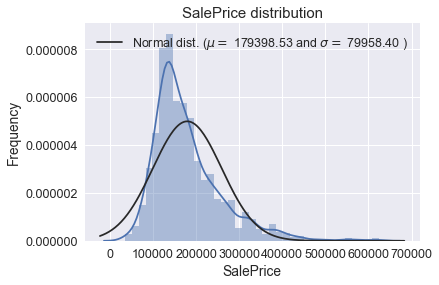

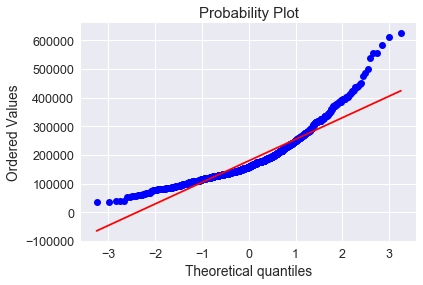

In [14]:
# check target variable 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Log-transformation of the target variable

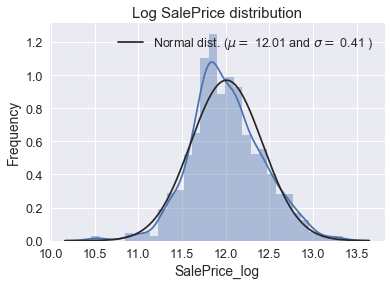

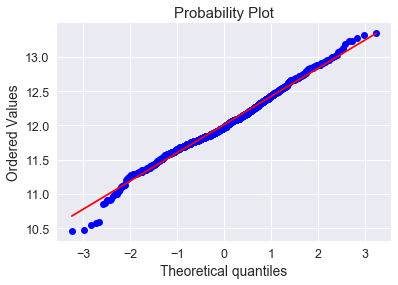

In [15]:
train['SalePrice_log'] = np.log1p(train["SalePrice"])
train['SalePrice_log'].head(3)

sns.distplot(train['SalePrice_log'], fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice_log'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Log SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice_log'], plot=plt)
plt.show()


In [16]:
train.drop(['SalePrice'], axis=1, inplace=True)

In [17]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice_log.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(["Id","SalePrice_log"], axis = 1, inplace = True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2648, 79)


### Check missing value

In [19]:
# check missing value 
result=all_data.isnull().sum()/len(all_data)*100
result=result.drop(result[result == 0].index).sort_values(ascending=False)[:30]
missing= pd.DataFrame({'Missing_Ratio' :result})
m=missing.head(30)
print(m)

              Missing_Ratio
PoolQC            99.735650
MiscFeature       96.601208
Alley             92.787009
Fence             80.475831
FireplaceQu       50.075529
LotFrontage        8.572508
GarageQual         5.740181
GarageCond         5.740181
GarageFinish       5.740181
GarageYrBlt        5.740181
GarageType         5.664653
BsmtExposure       2.870091
BsmtCond           2.870091
BsmtQual           2.832326
BsmtFinType2       2.794562
BsmtFinType1       2.756798
MasVnrType         0.604230
MasVnrArea         0.566465
MSZoning           0.151057
BsmtFullBath       0.075529
BsmtHalfBath       0.075529
Utilities          0.075529
Functional         0.075529
Electrical         0.037764
BsmtUnfSF          0.037764
Exterior1st        0.037764
Exterior2nd        0.037764
TotalBsmtSF        0.037764
GarageArea         0.037764
GarageCars         0.037764


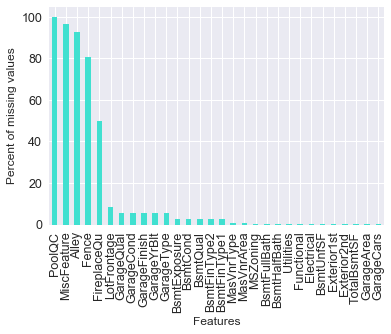

In [20]:
result.plot(kind='bar',x='result.index',y='Missing_Ratio',color='turquoise')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percent of missing values', fontsize=12)
plt.show()

###  Filling missing value 

In [21]:
## notes : based on the data description says NA means "No Pool". 
# categorical data
for col in ('PoolQC','MiscFeature','Alley','FireplaceQu','Fence','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType'):
    all_data[col] = all_data[col].fillna('None')

# numerical data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)    
    
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))     

In [22]:
all_data.isnull().sum().sort_values(ascending=False)[:10]

MSZoning       4
Utilities      2
Functional     2
Exterior1st    1
KitchenQual    1
SaleType       1
Electrical     1
Exterior2nd    1
YrSold         0
FireplaceQu    0
dtype: int64

In [23]:
all_data['MSZoning'].value_counts()

RL         2028
RM          441
FV          127
C (all)      25
RH           23
Name: MSZoning, dtype: int64

In [24]:
all_data['Functional'].value_counts()

Typ     2463
Min2      64
Min1      58
Mod       34
Maj1      17
Maj2       9
Sev        1
Name: Functional, dtype: int64

In [25]:
for col in ('MSZoning', 'Functional', 'Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].transform(lambda x:x.fillna(x.value_counts().index[0]))    

In [26]:
all_data['Functional'].value_counts()

Typ     2465
Min2      64
Min1      58
Mod       34
Maj1      17
Maj2       9
Sev        1
Name: Functional, dtype: int64

In [27]:
all_data.isnull().sum().sort_values(ascending=False)[:10] 

Utilities      2
YrSold         0
Foundation     0
ExterCond      0
ExterQual      0
Exterior1st    0
Exterior2nd    0
Fence          0
FireplaceQu    0
Fireplaces     0
dtype: int64

In [28]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond','BsmtFinType1','BsmtFinType2', 'BsmtExposure',
         'ExterQual', 'ExterCond', 'FireplaceQu', 'Functional', 'Fence', 
         'GarageQual', 'GarageCond', 'GarageFinish','HeatingQC', 'PoolQC',
         'LandSlope', 'KitchenQual','PavedDrive', 'LotShape', 'Street', 'Alley','CentralAir',
          'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for i in cols:
    new_label= LabelEncoder() 
    new_label.fit(list(all_data[i].values)) 
    all_data[i] = new_label.transform(list(all_data[i].values))
       
print('all_data: {}'.format(all_data.shape))

all_data: (2648, 79)


In [30]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [31]:
# drop irrelevant columns
all_data = all_data.drop(['Utilities','TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1)

In [32]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2648, 213)


In [33]:
all_data.to_csv('houseprice.csv')

In [34]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [35]:
train.shape

(1189, 213)

## Baseline Modeling 

In [36]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [50]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [51]:
models = [LinearRegression(),
          Ridge(),
          Lasso(alpha=0.01,max_iter=10000),
          RandomForestRegressor(),
          GradientBoostingRegressor()]

In [53]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR"]
for name, model in zip(names, models):
    score = rmse_cv(model, train.values, y_train)
    print("{}: {:.4f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 0.1314, 0.0106
Ridge: 0.1232, 0.0091
Lasso: 0.1335, 0.0030
RF: 0.1504, 0.0053
GBR: 0.1266, 0.0062


#### Modeling with featureting engirning 

In [43]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.decomposition import PCA, KernelPCA

In [61]:
scaler = RobustScaler()
X_scaled = scaler.fit(train.values).transform(train.values)
y_log = np.log(y_train)
test_X_scaled = scaler.transform(test.values)

In [66]:
X_scaled.shape, test_X_scaled.shape

((1189, 200), (1459, 200))

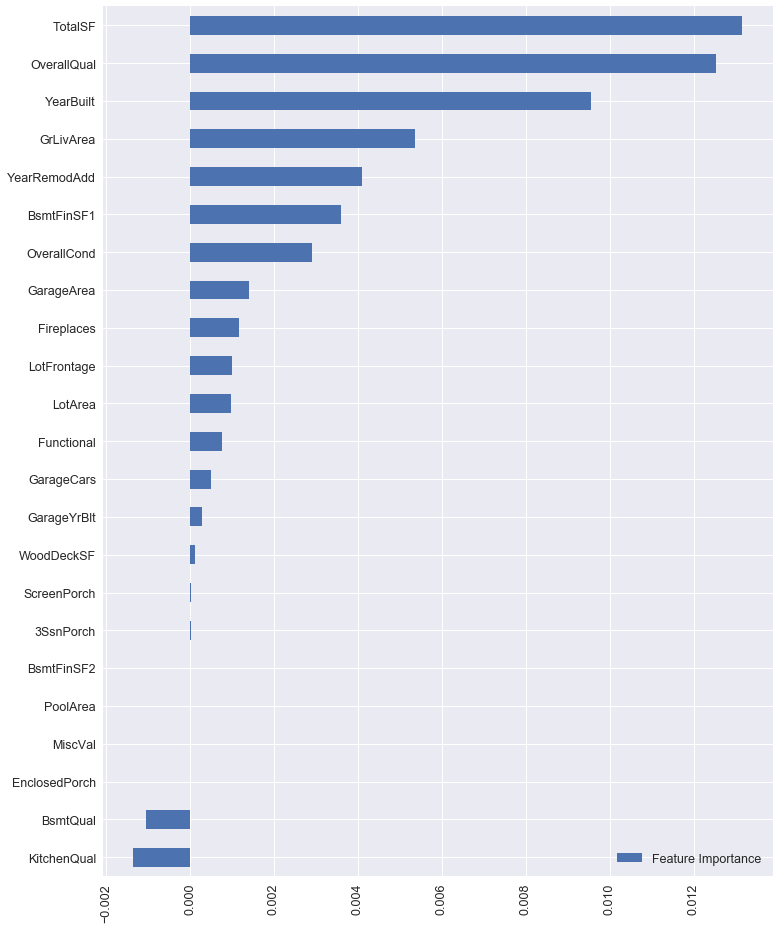

In [44]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=all_data.columns)

FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(12,16))
plt.xticks(rotation=90)
plt.show()

In [54]:
X_scaled = scaler.fit(train.values).transform(train.values)
y_log = np.log(y_train)
test_X_scaled = scaler.transform(test.values)

In [62]:
pca = PCA(n_components=200)
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [63]:
models = [LinearRegression(),
          Ridge(),
          Lasso(alpha=0.01,max_iter=10000),
          RandomForestRegressor(),
          GradientBoostingRegressor()]

In [64]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [65]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.4f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 48665816.4855, 59325665.3353
Ridge: 0.0105, 0.0008
Lasso: 0.0185, 0.0027
RF: 0.0167, 0.0004
GBR: 0.0140, 0.0008
